## **Prediction of Concrete Strength Using Artificial Neural Networks (ANNs)**

**Introduction**

Concrete is a widely used construction material, and its strength is crucial for structural integrity. This project aims to build an Artificial Neural Network (ANN) model to predict concrete strength based on input parameters like cement, water, and aggregate proportions. We use the concrete_data.csv dataset and apply data preprocessing, feature scaling, and deep learning techniques using TensorFlow. The goal is to achieve an accurate prediction model that can help optimize concrete mix designs.

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
print(tf.__version__)

2.18.0


In [3]:
df=pd.read_csv("/content/concrete_data.csv")
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [4]:
df.isnull().sum()

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Strength,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [6]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
df.duplicated().sum()

25

In [8]:
df.drop_duplicates(inplace=True)

<Axes: >

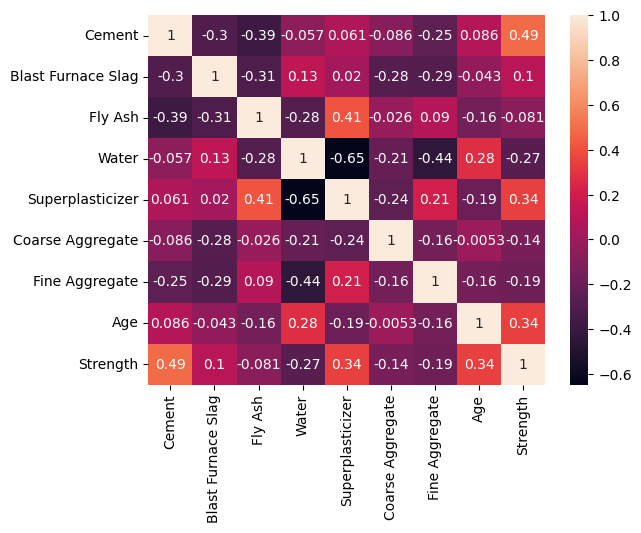

In [9]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='Strength'>

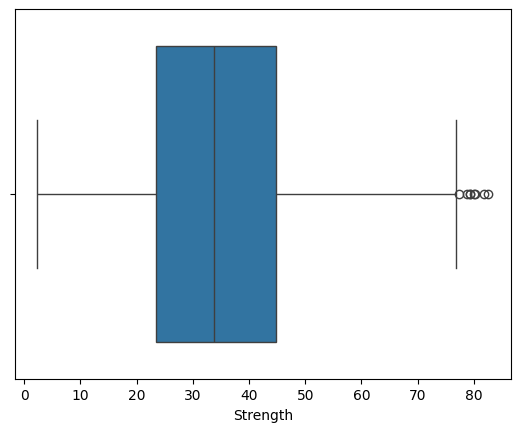

In [10]:
sns.boxplot(x=df['Strength'])

In [11]:
x=df.drop('Strength',axis=1)
y=df['Strength']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler


In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,LeakyReLU,ELU,PReLU

In [15]:
model = Sequential()
model.add(Dense(72, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(42, activation='relu'))
model.add(Dense(52, activation='relu'))
model.add(Dense(1,activation='linear'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [25]:
History=model.fit(x_train, y_train, epochs=100, batch_size=10, validation_split=0.1)

Epoch 1/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4768842.0000 - val_loss: 273.3022
Epoch 2/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 270.5929 - val_loss: 190.1413
Epoch 3/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 188.7685 - val_loss: 152.0071
Epoch 4/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 128.2857 - val_loss: 114.3625
Epoch 5/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 115.1270 - val_loss: 99.0399
Epoch 6/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 100.9914 - val_loss: 87.3215
Epoch 7/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 87.9759 - val_loss: 81.5705
Epoch 8/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 84.8634 - val_loss: 75.7752
Epoch 9/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 76.4021 - val_loss: 85.8902
Epoch 10/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 87.4017 - val_loss: 74.5749
Epoch 11/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 76.7416 - val_loss: 69.0847
Epoch 12/100
73/73 ━━━━━━━━

In [26]:
loss = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}')

# Predict using the model
predictions = model.predict(x_test)
print(predictions)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 59.9293 
Test Loss: 59.19310760498047
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
[[26.836992  ]
 [19.331045  ]
 [36.243866  ]
 [29.08444   ]
 [44.680885  ]
 [28.956024  ]
 [12.041675  ]
 [28.657171  ]
 [27.41789   ]
 [34.681313  ]
 [33.193203  ]
 [21.530249  ]
 [41.359535  ]
 [40.1514    ]
 [33.06321   ]
 [16.496305  ]
 [41.91858   ]
 [43.765213  ]
 [48.169724  ]
 [42.54465   ]
 [36.863907  ]
 [ 7.3948426 ]
 [37.68743   ]
 [29.121145  ]
 [ 9.102046  ]
 [30.080297  ]
 [55.21447   ]
 [29.30812   ]
 [16.38648   ]
 [54.086887  ]
 [48.269917  ]
 [50.360527  ]
 [51.997635  ]
 [43.143963  ]
 [16.671095  ]
 [52.592255  ]
 [41.73101   ]
 [42.4656    ]
 [43.01174   ]
 [71.8018    ]
 [36.014236  ]
 [21.490164  ]
 [31.04458   ]
 [44.21442   ]
 [49.764618  ]
 [49.61064   ]
 [60.96618   ]
 [25.514902  ]
 [59.710037  ]
 [37.392246  ]
 [20.052755  ]
 [55.66454   ]
 [33.57968   ]
 [13.03234   ]
 [23.294756  ]
 [35.635033  ]
 [48.813904  ]
 [13.179744  ]
 [42.9697

In [27]:

from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print(f'R-squared Score: {r2}')


R-squared Score: 0.8015817391656483


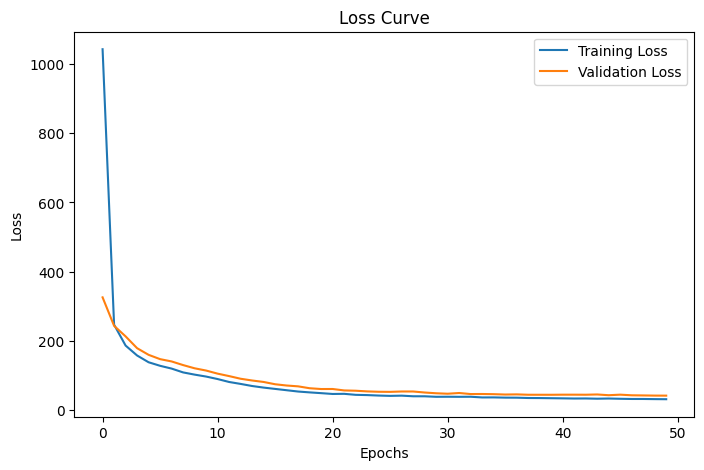

In [28]:
# Plot Loss Curve
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')

if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()
plt.show()


**Conclusion**

The ANN model was trained and evaluated on the concrete strength dataset, showing promising results. The model effectively learned patterns in the data, achieving a reasonable prediction accuracy. However, further improvements such as hyperparameter tuning, regularization, and ensemble methods could enhance performance. Future work could also explore alternative machine learning models like Random Forest or XGBoost for comparison.

